### **Set working environment** 

In [1]:
# Install Spark NLP from PyPI
!pip install -q spark-nlp==4.0.1 pyspark==3.3.0

To enable Spark session on Google Cloud Vertex AI Workbench Jupyterlab Notebook, follow the steps as follows or refer [here](https://stackoverflow.com/questions/73047089/how-to-start-spark-session-on-vertex-ai-workbench-jupyterlab-notebook/73061535?noredirect=1#comment129061260_73061535).

Sign in to Google Cloud Platform [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiT9svnmaX5AhVl7jgGHfxgBQYQFnoECAUQAQ&url=https%3A%2F%2Fconsole.cloud.google.com%2F&usg=AOvVaw1GxwHR1WZnDu0xsR-djCrv). Upon sign-in, on the Google Cloud console mainpage, go to ARTIFICIAL INTELLIGENCE section from the Navigation menu (denoted by 3 short horizontal solid lines) on the left panel and select Vertex AI then select Workbench. 
<br>Next, select USER-MANAGED-NOTEBOOK tab on the top panel to create Jupyterlab notebook. 
<br>Follow the following steps inside the notebook after creating the notebook. That is,
go to File->New->Terminal and run the following two commands in the Terminal:
<br>`sudo apt-get update`
<br>`sudo apt-get install default-jdk`

Lastly, verify if Java is installed with version by running this command: `java --version`.

In [2]:
# Import libraries
import time

import sparknlp
from sparknlp.base import *
from sparknlp.common import *
from sparknlp.annotator import *

from pyspark.sql import functions as func
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

# https://github.com/JohnSnowLabs/spark-nlp
# Start spark session
spark=sparknlp.start() 

print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

spark

:: loading settings :: url = jar:file:/opt/conda/lib/python3.7/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/jupyter/.ivy2/cache
The jars for the packages stored in: /home/jupyter/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-b644aea6-f060-4aad-85cf-8b3fc087800e;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.0.1 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#l

22/08/04 12:48:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Spark NLP version:  4.0.1
Apache Spark version:  3.3.0


In [3]:
# https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
# Display full output in output cell, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
import pandas as pd

# https://www.kaggle.com/questions-and-answers/118932
# Max rows and columns of pandas dataframe 
pd.options.display.max_rows,pd.options.display.max_columns

# https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
# Print all the contents of a pandas dataframe
pd.set_option('display.max_rows', None) # Print unlimited number of rows by setting to None, default is 10
pd.set_option('display.max_columns', None) # Do not truncate columns to display all of them by setting to None
pd.set_option('display.width', None) # Auto-detect the width of dataframe to display all columns in single line by setting to None
pd.set_option('display.max_colwidth', None) # Auto detect the max size of column and print contents of that column without truncated the contents

(60, 20)

### **Mount to Google Drive**
*   Within Google Cloud Vertex AI Workbench Jupyterlab Notebook, follow:
    - https://stackoverflow.com/questions/61449536/mount-google-drive-from-ai-platform-notebook
    - [Screenshot](https://github.com/wongkhoon/Coursera/blob/main/Advanced%20Data%20Science%20with%20IBM/Advanced%20Data%20Science%20Capstone/GoogleCloudPlatform_VertexAI_Workbench_JupyterlabNotebook_Terminal_20220722.txt) 
<br>

    in order to load train and test set parquet files from Google Drive in Google Cloud Platform Vertex AI Jupyterlab Notebook

### **Deep learning algorithm**
*   **ClassifierDL with transformer based Universal Sentence Embeddings by Spark NLP<sup>[1](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32)</sup>**
<br> -  ClassifierDL uses the state-of-the-art Universal Sentence Encoder as an input for text classifications. The ClassifierDL annotator uses a deep learning model (DNNs) Spark NPL team has built inside TensorFlow and supports up to 100 classes.<sup>[2](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/annotators/classifier/dl/ClassifierDLApproach)</sup> 
<br> -  The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.<sup>[3,](https://nlp.johnsnowlabs.com/2020/04/17/tfhub_use.html)</sup> <sup>[4](https://nlp.johnsnowlabs.com/docs/en/transformers)</sup>
<br> -  The model is trained and optimized for greater-than-word length text, such as sentences, phrases or short paragraphs. It is trained on a variety of data sources and a variety of tasks with the aim of dynamically accommodating a wide variety of natural language understanding tasks. The input is variable length English text and the output is a 512 dimensional vector. The universal-sentence-encoder-large model is trained with a Transformer encoder.<sup>[5](https://tfhub.dev/google/universal-sentence-encoder-large/5)</sup>



In [5]:
start = "\033[1m" # Bold text
end = "\033[0;0m" # Reset 

documentAssembler = DocumentAssembler() \
      .setInputCol("text") \
      .setOutputCol("document")
      
# Tranformer based universal encoding model
useEmbeddings = UniversalSentenceEncoder.pretrained(name="tfhub_use_lg", lang="en")\
              .setInputCols("document")\
              .setOutputCol("use_embeddings")

# https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/classifier_dl/classifier_dl/index.html#sparknlp.annotator.classifier_dl.classifier_dl.ClassifierDLApproach
# https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/EmbeddingsFinisher

# Default paramaters:
classsifierdl = ClassifierDLApproach()\
              .setInputCols(["use_embeddings"])\
              .setOutputCol("class")\
              .setLabelColumn("Recommended IND")\
              .setRandomSeed(42)\
              .setEnableOutputLogs(True)

use_pipeline = Pipeline(stages=[documentAssembler,useEmbeddings,classsifierdl])

tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
[ | ]tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
Download done! Loading the resource.
[ | ]

2022-08-04 12:48:31.237597: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[ — ]

[OK!]


Above warnings are safe to disregard according to https://lists.apache.org/thread/0b2g6pn2f65c8xc12jfhkk8c8otsgvhc

#### **Mount to Google Drive**
*   On Google Cloud Vertex AI Workbench Jupyterlab Notebook, follow instructions:
    - Either [this](https://stackoverflow.com/questions/61449536/mount-google-drive-from-ai-platform-notebook)
    - Or this - [Terminal commands snapshot within the Google Cloud Platform Vertex AI Workbench Jupyterlab Notebook](https://github.com/wongkhoon/Coursera/blob/23ba493ec53d07aac6bfbcd2e4ec9cc3bd0bd779/Advanced%20Data%20Science%20with%20IBM/Advanced%20Data%20Science%20Capstone/GoogleCloudPlatform_VertexAI_Workbench_JupyterlabNotebook_Terminal_20220722.txt)
<br>

    in order to load train and test set parquet files from Google Drive in Google Cloud platform Vertex AI Jupyterlab Notebook

#### **Training**
*   Default hyperparameters




In [6]:
# To load
train_txt = spark.read.parquet('mnt/gdrivefs/Colab Notebooks/train_txt.parquet')

starttrain = time.time()
use_pipelineModel = use_pipeline.fit(train_txt)
endtrain = time.time()

2022-08-04 12:52:05.955078: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/2f98093113b9_classifier_dl17673851895214317633
2022-08-04 12:52:06.033280: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2022-08-04 12:52:06.033359: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /tmp/2f98093113b9_classifier_dl17673851895214317633
2022-08-04 12:52:06.631729: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-08-04 12:52:07.938914: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/2f98093113b9_classifier_dl17673851895214317633
2022-08-04 12:52:08.136667: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 2181606 microse

Training started - epochs: 30 - learning_rate: 0.005 - batch_size: 64 - training_examples: 4846 - classes: 2
Epoch 1/30 - 0.90s - loss: 37.158993 - acc: 0.82206523 - batches: 76
Epoch 2/30 - 0.51s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 3/30 - 0.51s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 4/30 - 0.51s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 5/30 - 0.50s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 6/30 - 0.54s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 7/30 - 0.51s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 8/30 - 0.50s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 9/30 - 0.51s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 10/30 - 0.50s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 11/30 - 0.51s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 12/30 - 0.52s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Epoch 13/30 - 0.49s - loss: 36.807884 - acc: 0.8324819 - batches: 76
Ep

In [7]:
print(start+"---- ClassifierDL with transformer-based Universal Sentence Embeddings ----\n"+end)
print('Training time taken in seconds: {}'.format(round(endtrain-starttrain,4)))

---- ClassifierDL with transformer-based Universal Sentence Embeddings ----

Training time taken in seconds: 420.804


#### **Prediction**

In [8]:
# To load
test = spark.read.parquet('mnt/gdrivefs/Colab Notebooks/test.parquet')

startpred = time.time()
predictions_use=use_pipelineModel.transform(test)
endpred = time.time()
print(start+"Prediction time taken in seconds:"+end,format(endpred-startpred))

# https://stackoverflow.com/questions/62643843/explode-array-values-using-pyspark
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
# Explode the array and get the item(s) inside of result column out
# Keep only 2 columns: Recommended IND (actual) and prediction
# Convert to double else .evaluate will throw error
predictions_use=predictions_use.select('class','Recommended IND').selectExpr("*","explode(class)").select("*","col.*").drop(*['col','class']) \
            .select('Recommended IND','result').withColumnRenamed("result","prediction") \
            .withColumn("prediction" , col("prediction").cast(DoubleType())) 

Prediction time taken in seconds: 0.5466587543487549


#### **Evaluation metrics**

In [9]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType

sdf=predictions_use.select("Recommended IND","prediction")

# Convert to Pandas dataframe in order to generate confusion matrix and classification report                 
pdf=sdf.toPandas()
# Take a look at the random 5 entries from the Pandas dataframe containing the prediction and actual label i.e. Recommended IND and 
pdf.sample(5)

22/08/04 12:55:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Recommended IND,prediction
475,1,1.0
572,1,1.0
612,1,1.0
417,0,1.0
589,1,1.0


Text(0.5, 1.0, 'Confusion matrix: \n Deep learning algorithmn by tranformer-based Universal Sentence Encoder')

Text(0.5, 15.0, 'Predicted Labels')

Text(33.0, 0.5, 'Actual Labels')

[Text(0, 0.5, 'Not recommended'), Text(0, 1.5, 'Recommended')]

[Text(0.5, 0, 'Not recommended'), Text(1.5, 0, 'Recommended')]

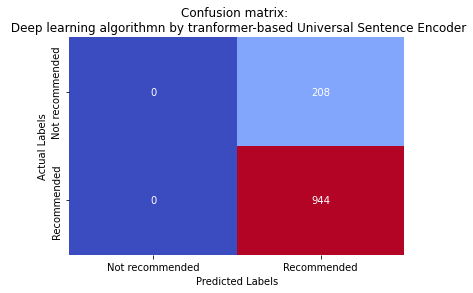

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pdf["Recommended IND"],pdf["prediction"])

import seaborn as sns
ax=sns.heatmap(cm, annot=True, fmt="d",cbar=False, cmap="coolwarm")
ax.set_title("Confusion matrix: \n Deep learning algorithmn by tranformer-based Universal Sentence Encoder")
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.yaxis.set_ticklabels(['Not recommended', 'Recommended'])
ax.xaxis.set_ticklabels(['Not recommended', 'Recommended'])

In [11]:
from sklearn.metrics import classification_report
print(start+"Classification report:"+end)
print(classification_report(pdf["Recommended IND"],pdf["prediction"],target_names=["Not recommended","Recommended"]))

Classification report:
                 precision    recall  f1-score   support

Not recommended       0.00      0.00      0.00       208
    Recommended       0.82      1.00      0.90       944

       accuracy                           0.82      1152
      macro avg       0.41      0.50      0.45      1152
   weighted avg       0.67      0.82      0.74      1152



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zero "Not recommended" predicted in test set hence the warnings generated i.e. precision/recall/f1-score all 0.00 for classification report.

In [12]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
binary_evaluator = BinaryClassificationEvaluator(labelCol='Recommended IND',rawPredictionCol='prediction',metricName='areaUnderPR')

auc_use = binary_evaluator.evaluate(predictions_use, {binary_evaluator.metricName: "areaUnderROC"}) #https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.evaluation.BinaryClassificationMetrics.html
aucPR_use = binary_evaluator.evaluate(predictions_use, {binary_evaluator.metricName: "areaUnderPR"})

print('Area under the receiver operating characteristic (ROC) curve = {:.4f}\nArea under the precision-recall curve                        = {:.4f}'.format(auc_use,aucPR_use))

Area under the receiver operating characteristic (ROC) curve = 0.5000
Area under the precision-recall curve                        = 0.8194
